In [1]:
# Consider  the  following  training  data  set.  Write  a  program  to  construct  a  decision 
#  tree using  ID3  algorithm.
# Display  Accuracy  measures  for  the  same  and  predict  a  class  of suitable query.

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [3]:
data = pd.read_csv("ML9.csv")
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
x = data.iloc[:,:-1]
x
y = data.iloc[:,-1]
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Tennis, dtype: object

In [5]:
le = LabelEncoder()
x = x.apply(le.fit_transform)
x


,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [6]:
print("Outlook: ",list(zip(data.iloc[:,0],x.iloc[:,0])))
print("Temperature: ",list(zip(data.iloc[:,1],x.iloc[:,1])))
print("Humidity: ",list(zip(data.iloc[:,2],x.iloc[:,2])))
print("Wind: ",list(zip(data.iloc[:,3],x.iloc[:,3])))

Outlook:  [('Sunny', 2), ('Sunny', 2), ('Overcast', 0), ('Rain', 1), ('Rain', 1), ('Rain', 1), ('Overcast', 0), ('Sunny', 2), ('Sunny', 2), ('Rain', 1), ('Sunny', 2), ('Overcast', 0), ('Overcast', 0), ('Rain', 1)]
Temperature:  [('Hot', 1), ('Hot', 1), ('Hot', 1), ('Mild', 2), ('Cool', 0), ('Cool', 0), ('Cool', 0), ('Mild', 2), ('Cool', 0), ('Mild', 2), ('Mild', 2), ('Mild', 2), ('Hot', 1), ('Mild', 2)]
Humidity:  [('High', 0), ('High', 0), ('High', 0), ('High', 0), ('Normal', 1), ('Normal', 1), ('Normal', 1), ('High', 0), ('Normal', 1), ('Normal', 1), ('Normal', 1), ('High', 0), ('Normal', 1), ('High', 0)]
Wind:  [('Weak', 1), ('Strong', 0), ('Weak', 1), ('Weak', 1), ('Weak', 1), ('Strong', 0), ('Strong', 0), ('Weak', 1), ('Weak', 1), ('Weak', 1), ('Strong', 0), ('Strong', 0), ('Weak', 1), ('Strong', 0)]


In [7]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x,y)


DecisionTreeClassifier(criterion='entropy')

In [8]:
query = np.array([2,1,0,0])
pred = dt.predict([query])
pred

array(['No'], dtype=object)

[Text(148.8, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(186.0, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.232, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 65.232,

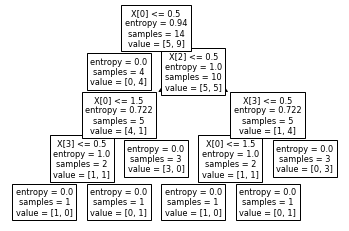

In [9]:
plot_tree(dt)